# **Exploratory Spending Analysis: How Much Have I Spent on Amazon?**

### **Executive Summary:**
This project is an exploratory analysis of Amazon spending trends using **Excel** and **Python**. Over the years, with frequent Amazon purchases, this analysis provides insights into spending habits, categories, and changes over time. I extracted my personal order data, cleaned and transformed it, then visualized spending trends with the goal of identifying patterns and making data-driven recommendations to optimize future purchasing decisions.

The analysis revealed key trends, such as spending spikes during holiday seasons and increasing volumes of returns in certain categories, indicating increasing dissatisfaction. Based on these insights, I recommend strategies to better manage spending and make informed decisions regarding future Amazon purchases.

---

### **Business Problem:**
Frequent Amazon shoppers may not have a clear understanding of their spending habits or how those habits evolve over time. Without visibility into how much is spent on different categories, individuals cannot optimize their purchasing decisions. By analyzing historical spending data, we aim to identify spending patterns and provide insights to help users make more conscious purchasing choices.

## **Key Questions**:
1. What categories make up the largest portion of spending?
    + *KEY METRIC*: **Total spend** per category
2. How does spending change over time (e.g., seasonality, sales events, different households)?
    + *KEY METRIC*: **Daily/Monthly/quarterly/yearly spend**, **seasonal** spending peaks, changes during sales events.
3. What types of items did I regeret buying the most, or needed to return for defect/other issues?
    + *KEY METRIC*: **Number** of returns by category, **reasons** for returns, items with highest regret rates.

---

### **Methodology:**
1. **Data Extraction**: Collected raw data from personal Amazon order history (downloaded as CSV). 
The files: 
+ retailorderhistory
+ retailreturns
+ retailpayments
2. **Data Cleaning**: Used Excel to import and partially clean the data by handling missing values, standardizing category names, fill and/or eliminating irrelevant or incomplete data points, as well as joing retailreturns and retailpayments sheets together using pivot tables to sort efficiently.

files to clean 
>*orders*: 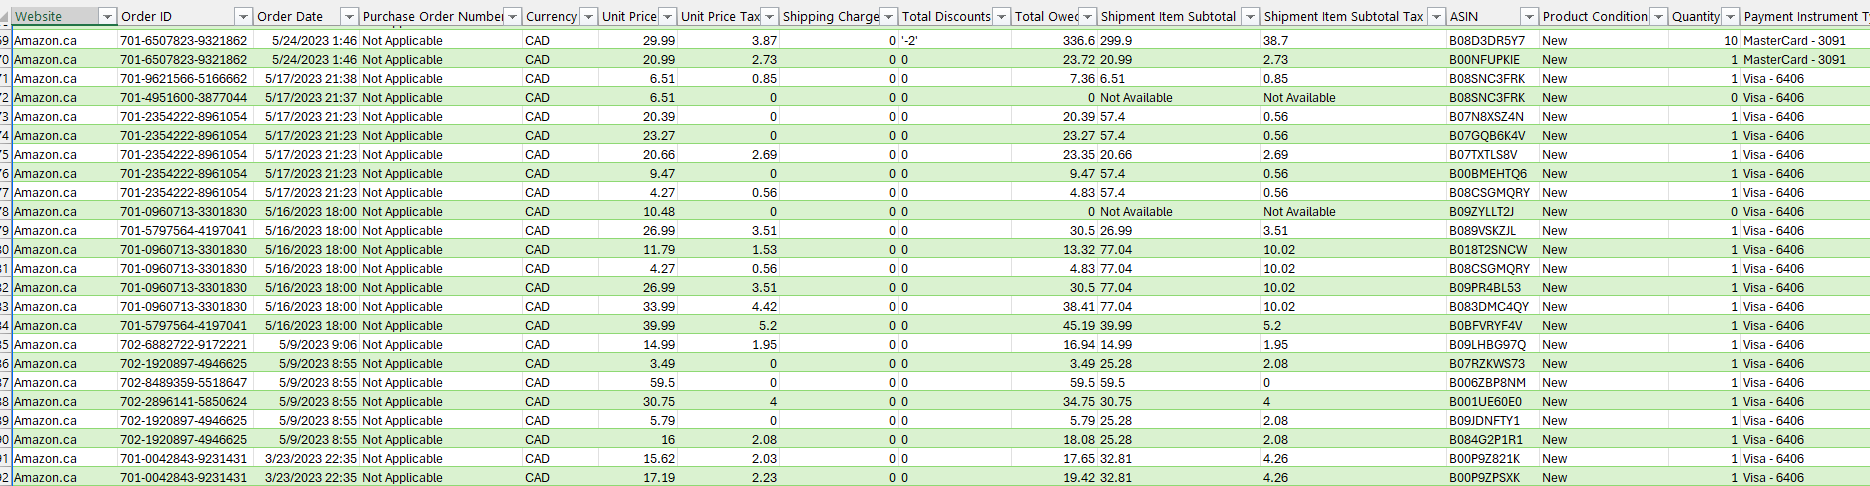

>*returns*: 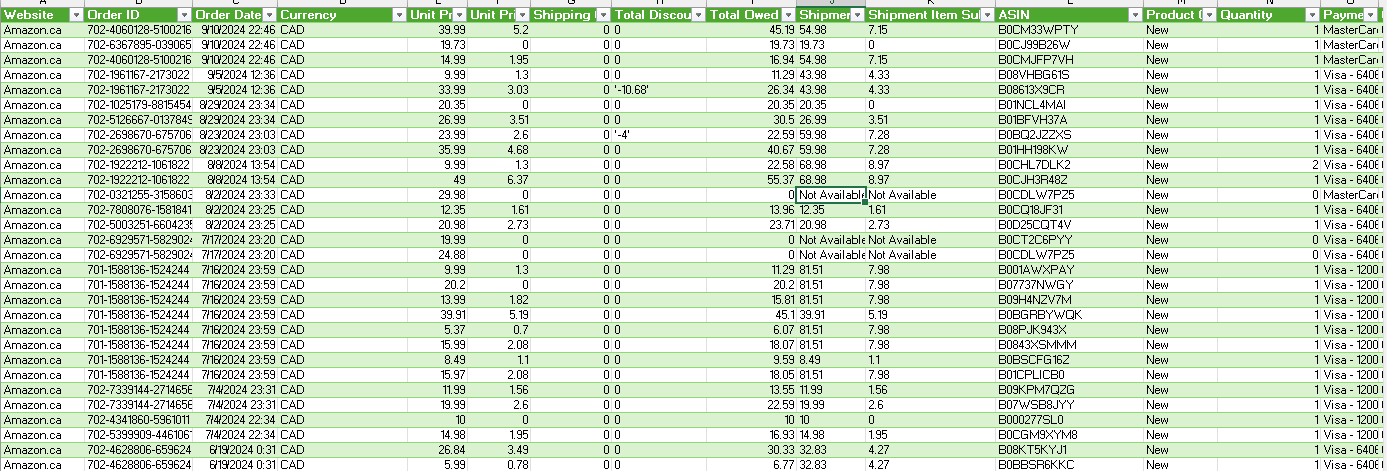

### merging returns and return payments into one table to later join on to our order history table with VLOOKUP
>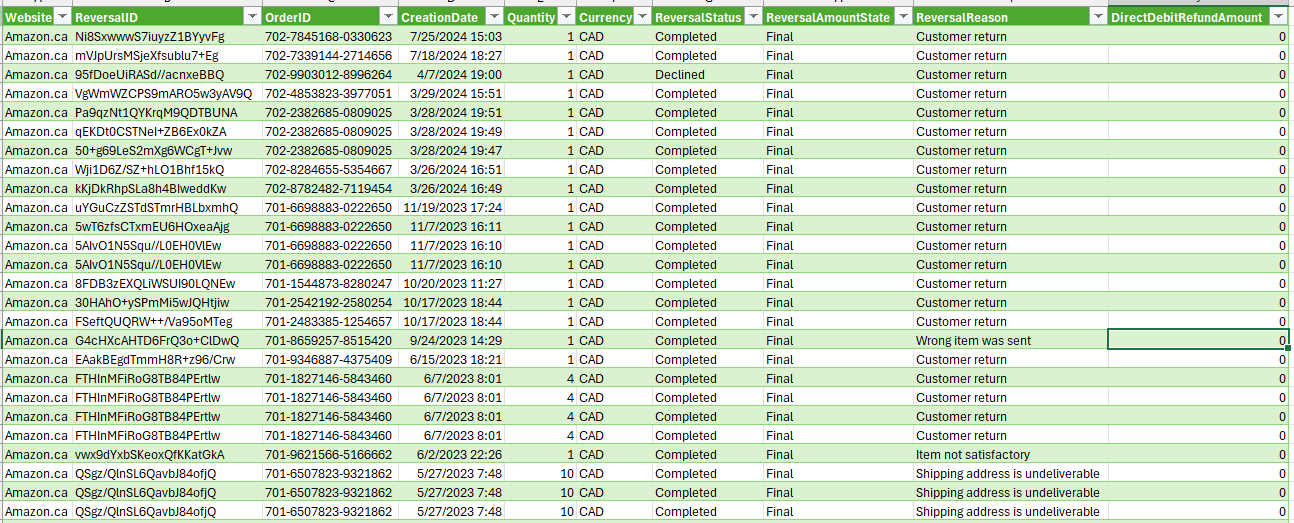 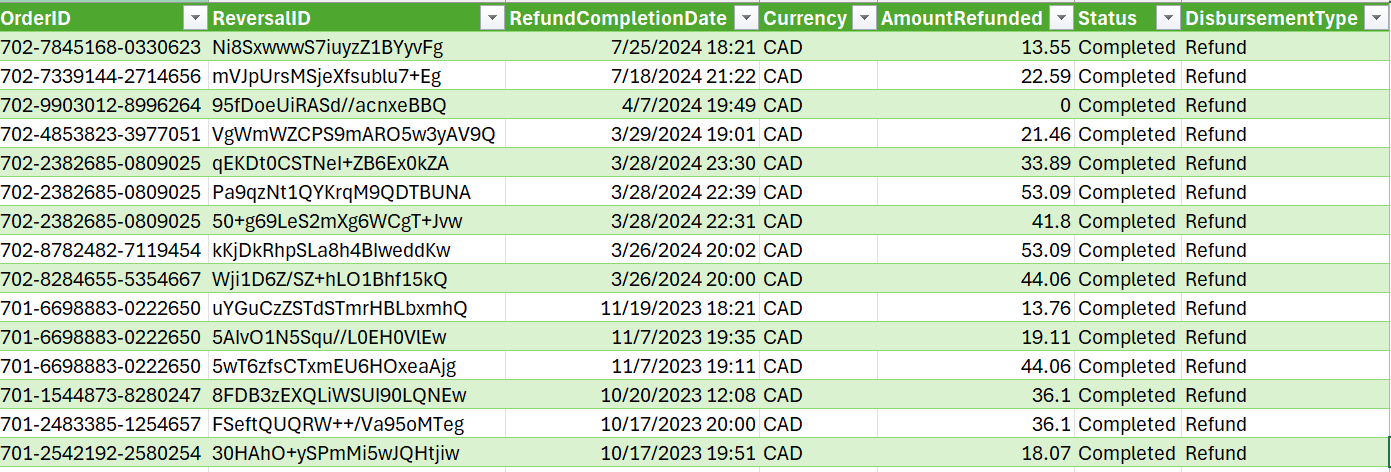

### After join:
>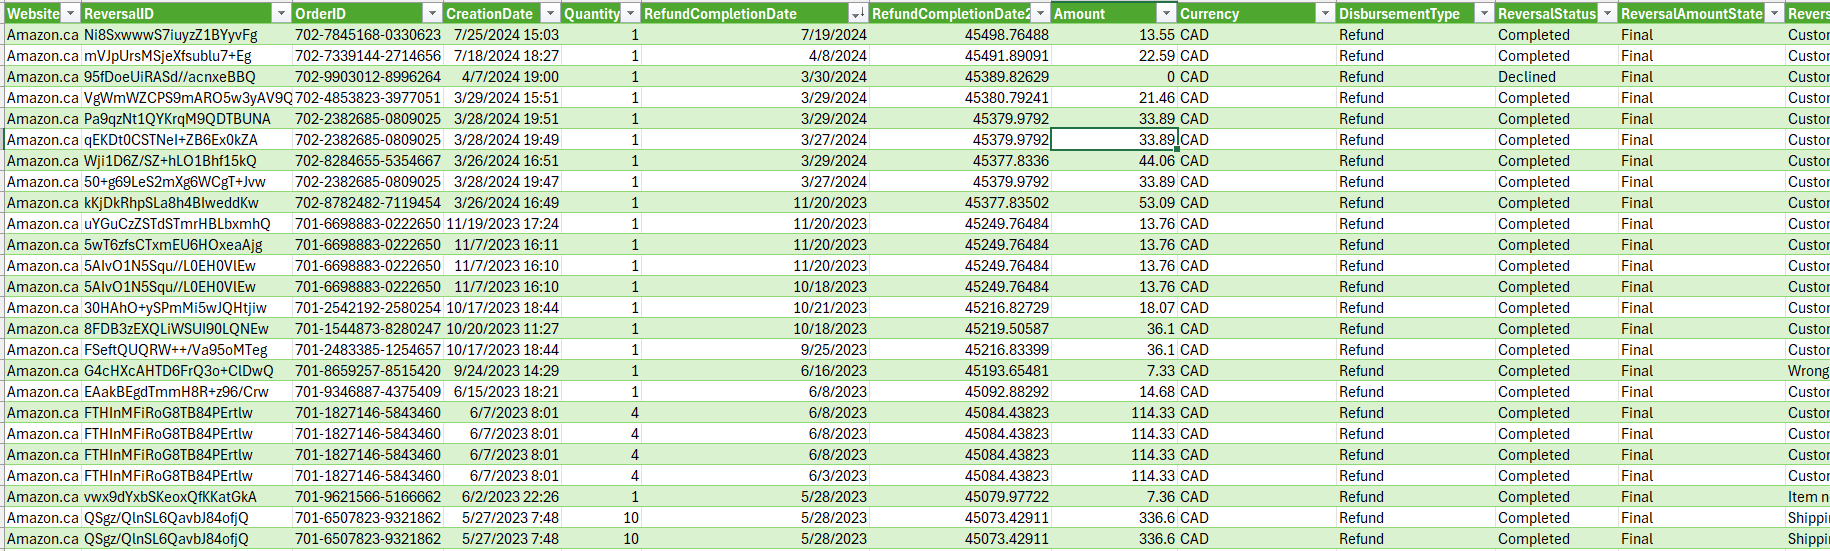



## Pandas for Data Analysis


3. **Data Analysis**:
+ Utilized **Pandas** & **Matplotlib** to further analyze the data, performing trend analysis and visualizing key metrics like monthly spend and top categories.
+ Queried the dataset using SQL to generate insights such as total spend per category and trends over time. 


In [101]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('Retail.OrderHistory.1.csv')
df.head()
df.shape

# first lets clean some data - remove the NaN rows and replace with a value
# Replace "Not Available" with a specific value
df.replace('Not Available', 0, inplace=True)
df.head()
display(df)


C:\Users\user\AppData\Local\Temp\ipykernel_14824\67942834.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('Not Available', 0, inplace=True)


,Website,Order ID,Order Date,Purchase Order Number,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,...,Order Status,Shipment Status,Ship Date,Shipping Option,Carrier Name & Tracking Number,Product Name,Gift Message,Gift Sender Name,Gift Recipient Contact Details,Item Serial Number
0,Amazon.ca,702-4060128-5100216,2024-09-11T02:46:10Z,Not Applicable,CAD,39.99,5.20,0.0,0,45.19,...,Closed,Shipped,2024-09-12T02:00:38.882Z,second-ca,AMZN_CA(TBC196647251009),"Vacuum Storage Bags 12 Jumbo, Space Saver Seal...",0,0,0,0
1,Amazon.ca,702-6367895-0390655,2024-09-11T02:46:10Z,Not Applicable,CAD,19.73,0.00,0.0,0,19.73,...,Closed,Shipped,2024-09-11T15:11:45.482Z,std-intl-us-ca-fba,AMZN_CA(TBC196615860009),frepstudio Cute Case Compatible for iPhone 15 ...,0,0,0,0
2,Amazon.ca,702-4060128-5100216,2024-09-11T02:46:10Z,Not Applicable,CAD,14.99,1.95,0.0,0,16.94,...,Closed,Shipped,2024-09-12T02:00:38.882Z,second-ca,AMZN_CA(TBC196647251009),"Electric Air Pump for Vacuum Storage Bags, Por...",0,0,0,0
3,Amazon.ca,702-1961167-2173022,2024-09-05T16:36:39Z,Not Applicable,CAD,9.99,1.30,0.0,0,11.29,...,Closed,Shipped,2024-09-06T01:10:10.657Z,next-ca,AMZN_CA(TBC190843117009),"100PCS Nitrile Disposable Gloves , Latex Free ...",0,0,0,0
4,Amazon.ca,702-1961167-2173022,2024-09-05T16:36:39Z,Not Applicable,CAD,33.99,3.03,0.0,'-10.68',26.34,...,Closed,Shipped,2024-09-06T01:10:10.657Z,next-ca,AMZN_CA(TBC190843117009),Bedsure Queen Sheet Set - Soft Sheets for Quee...,0,0,0,Authenticity_2D=AZ:8P3USDRXH5F3JFPY33C8KKD36Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Amazon.ca,701-1634051-4297837,2021-07-31T02:52:29Z,Not Applicable,CAD,249.99,32.50,0.0,0,282.49,...,Closed,Shipped,2021-08-01T05:53:03Z,second-ca,PUROLATOR(MWG003780664),TCL 32S327-CA 1080p Smart LED Television (2019...,Ship in Amazon packaging selected,0,0,0
518,Amazon.ca,701-1066151-4578605,2021-06-11T01:33:29Z,Not Applicable,CAD,16.99,0.00,0.0,0,16.99,...,Closed,Shipped,2021-06-22T05:02:04Z,econ-ca,AMZN_CA(TBC241044999009),Foot File Callus Remover - INFILILA Foot Rasp ...,0,0,0,0
519,Amazon.ca,701-1066151-4578605,2021-06-11T01:33:29Z,Not Applicable,CAD,18.99,0.00,0.0,0,18.99,...,Closed,Shipped,2021-06-22T05:02:04Z,econ-ca,AMZN_CA(TBC241044999009),Maryton Pumice Stone for Feet - Foot Scrubber ...,0,0,0,Authenticity_2D=AZ:35ZEPHE64BF7JO6GT4HFA7TG3U
520,Amazon.ca,701-0380288-7899433,2021-06-08T01:50:58Z,Not Applicable,CAD,37.28,1.86,0.0,0,78.28,...,Closed,Shipped,2021-06-08T19:46:50Z,econ-ca,CP_XPRESSPOST_CANADA(1023245111231372),Diapers Size 4 - Huggies Little Snugglers Disp...,Enjoy your gift!\nFrom Joan Keizer,Joan Keizer,0,0


In [102]:
# Drop unnecessary columns not relevant to the analysis
df.drop(['Website', 'Purchase Order Number','Unit Price', 'Unit Price Tax', 'Shipping Charge', 'Shipment Item Subtotal',
       'Shipment Item Subtotal Tax', 'Product Condition', 'Shipment Status',
       'Shipping Option', 'ASIN','Billing Address', 'Gift Message',
       'Gift Sender Name', 'Gift Recipient Contact Details',
       'Item Serial Number'], axis=1, errors='ignore', inplace=True)
df.head()

,Order ID,Order Date,Currency,Total Discounts,Total Owed,Quantity,Order Status,Ship Date,Carrier Name & Tracking Number,Product Name
0,702-4060128-5100216,2024-09-11T02:46:10Z,CAD,0,45.19,1,Closed,2024-09-12T02:00:38.882Z,AMZN_CA(TBC196647251009),"Vacuum Storage Bags 12 Jumbo, Space Saver Seal..."
1,702-6367895-0390655,2024-09-11T02:46:10Z,CAD,0,19.73,1,Closed,2024-09-11T15:11:45.482Z,AMZN_CA(TBC196615860009),frepstudio Cute Case Compatible for iPhone 15 ...
2,702-4060128-5100216,2024-09-11T02:46:10Z,CAD,0,16.94,1,Closed,2024-09-12T02:00:38.882Z,AMZN_CA(TBC196647251009),"Electric Air Pump for Vacuum Storage Bags, Por..."
3,702-1961167-2173022,2024-09-05T16:36:39Z,CAD,0,11.29,1,Closed,2024-09-06T01:10:10.657Z,AMZN_CA(TBC190843117009),"100PCS Nitrile Disposable Gloves , Latex Free ..."
4,702-1961167-2173022,2024-09-05T16:36:39Z,CAD,'-10.68',26.34,1,Closed,2024-09-06T01:10:10.657Z,AMZN_CA(TBC190843117009),Bedsure Queen Sheet Set - Soft Sheets for Quee...


In [103]:
# awesome - now we have relevant columns to work with - lets move on to converting some strings and making sure we can calculate question 1.
# Check the data type of the 'Total Discounts' column
print(df['Total Owed'].dtype)
print(df['Total Discounts'].dtype)
# Step 1: Convert 'Total Discounts' to string type (for all elements)
df['Total Discounts'] = df['Total Discounts'].astype(str)

# Step 2: Remove the single quotes from 'Total Discounts' column
df['Total Discounts'] = df['Total Discounts'].str.replace("'", "", regex=True)

# Step 3: Convert 'Total Discounts' to numeric
df['Total Discounts'] = pd.to_numeric(df['Total Discounts'], errors='coerce')

print(df['Total Discounts'].dtype)
df.tail(10)

float64
object
float64


,Order ID,Order Date,Currency,Total Discounts,Total Owed,Quantity,Order Status,Ship Date,Carrier Name & Tracking Number,Product Name
512,701-2406470-2972255,2021-09-20T08:14:15Z,CAD,0.0,0.00,0,Cancelled,0,0,"Toaster Oven Tray and Rack Set,P&P CHEF Stainl..."
513,701-3316816-0303438,2021-08-18T05:44:39Z,CAD,0.0,33.89,1,Closed,2021-08-19T04:57:50Z,AMZN_CA(TBC264473837009),"LE RGB LED Light Bulb, A19 E26 6W RGBW Color C..."
514,701-3316816-0303438,2021-08-18T05:44:39Z,CAD,0.0,12.43,1,Closed,2021-08-19T04:57:50Z,AMZN_CA(TBC264473837009),"Jack Black Moisture Therapy Lip Balm SPF 25, L..."
515,701-7985998-7081009,2021-08-18T05:44:39Z,CAD,0.0,23.72,1,Closed,2021-08-18T12:46:10Z,AMZN_CA(TBC264255623009),HitLights Heavy Duty Double Sided Foam Mountin...
516,701-7985998-7081009,2021-08-18T05:44:39Z,CAD,0.0,12.42,1,Closed,2021-08-18T19:48:08Z,AMZN_CA(TBC264324862009),"10 Pack Toothbrush Heads Covers, Travel Electr..."
517,701-1634051-4297837,2021-07-31T02:52:29Z,CAD,0.0,282.49,1,Closed,2021-08-01T05:53:03Z,PUROLATOR(MWG003780664),TCL 32S327-CA 1080p Smart LED Television (2019...
518,701-1066151-4578605,2021-06-11T01:33:29Z,CAD,0.0,16.99,1,Closed,2021-06-22T05:02:04Z,AMZN_CA(TBC241044999009),Foot File Callus Remover - INFILILA Foot Rasp ...
519,701-1066151-4578605,2021-06-11T01:33:29Z,CAD,0.0,18.99,1,Closed,2021-06-22T05:02:04Z,AMZN_CA(TBC241044999009),Maryton Pumice Stone for Feet - Foot Scrubber ...
520,701-0380288-7899433,2021-06-08T01:50:58Z,CAD,0.0,78.28,2,Closed,2021-06-08T19:46:50Z,CP_XPRESSPOST_CANADA(1023245111231372),Diapers Size 4 - Huggies Little Snugglers Disp...
521,701-0380288-7899433,2021-06-08T01:50:58Z,CAD,0.0,37.23,1,Closed,2021-06-09T18:43:53Z,PUROLATOR(CGH006134813),Baby Monthly Milestone Blanket Woodland - Baby...


In [104]:
total_spent = df['Total Owed'].sum()
total_disc = df['Total Discounts'].sum()
print(total_spent)
print(total_disc)
# Now lets use some key calculations to reveal some unique insights about my family's purchases!
#Avergage
print(df['Total Owed'].mean())
#Median
print(df['Total Owed'].median())
#Highest priced item
print(df['Total Owed'].max())
#Lowest priced item
print(df['Total Owed'].min())


15313.890000000001
-63.96
29.336954022988508
20.155
507.22
0.0


## **Key Questions**:
1. What categories make up the largest portion of spending?
    + *KEY METRIC*: **Total spend** per category


In [105]:
df['Product Name']

0      Vacuum Storage Bags 12 Jumbo, Space Saver Seal...
1      frepstudio Cute Case Compatible for iPhone 15 ...
2      Electric Air Pump for Vacuum Storage Bags, Por...
3      100PCS Nitrile Disposable Gloves , Latex Free ...
4      Bedsure Queen Sheet Set - Soft Sheets for Quee...
                             ...                        
517    TCL 32S327-CA 1080p Smart LED Television (2019...
518    Foot File Callus Remover - INFILILA Foot Rasp ...
519    Maryton Pumice Stone for Feet - Foot Scrubber ...
520    Diapers Size 4 - Huggies Little Snugglers Disp...
521    Baby Monthly Milestone Blanket Woodland - Baby...
Name: Product Name, Length: 522, dtype: object

In [106]:
categories = {
    'Electronics': ['headphones', 'electric', 'batteries', 'charger', 'charge', 'usb', 'computer', 'laptop', 
                   'television', 'power','cord', 'smartwatch', 'led', 'kitchen system', 'stylus','blender', 'processor', 'remote'],
    'Supplies & Study': ['desk', 'book', 'markers','exam', 'note'],
    'Clothing and Accessories': ['coat', 'costume', 'case','shirt', 'rings','pant', 'leather', 'cotton', 'dress', 'jeans', 'vest', 'leggings','swimsuit', 'necklace'
                                 'girls','girl','boy','mens', 'boots','bra', 'hat', 'bag', 'belt', 'boys','unisex','socks','silver','scarf','hypoallergenic','chain'],
    'Home': ['home', 'closet', 'rubbing alcohol', 'hangers','dorm','bed', 'curtains', 'furniture', 'sheet', 'aromatherapy', 'shower','bleach', 
             'pillow', 'mop', 'cleaning','laundry','towel', 'toilet', 'filter','soap', 'utility','adhesive','wall safe', 'pin', 'poster'],
    'Food & Kitchen': ['kitchen', '8oz', 'peppermint', 'chai', 'bar', 'paste', 'chocolate','furniture','flour', 'flavour','flavoured', 'dishwasher', 'food','grocery','honey', 'cooking', 'pasta','beans', 'tea','baking','gloves'],
    'Beauty and Personal Care': ['skincare', 'powder', 'patch', 'razor', 'face','oil','butter', 'facial', 'treatment', 'lip', 'tooth', 'skin', 'curl', 'curls', 'hair', 'piercing', 'ear', 'eye', 'conditioner','texturizer', 'cosmetic', 'finish' ,'dye', 'gel',                                 'cleanser','brush','braid','pencil', 'sunscreen','moisturizer','shampooo','spf' 'haircare', 'cosmetics', 
                                  'plated', 'foot', 'nails', 'body','deodorant', 'styling', 'hold', 'mousse', 'moisture', 'moisturizer','lotion','shampoo','mist','makeup','make up', 'matte'],
    'Health and Wellness': ['fitness', 'health', 'supplement', 'solution', 'mood', 'strength', 'vitamin', 'capsule', 'workout','active','injury','relief','cream','caps''wrist', 'knee', 'brace'],
    'Hobbies & Games': ['toy', 'game','puzzle','craft','art'],
    'Sports and Outdoors': ['sport', 'bike','outdoor','lock'],
}

# Function to categorize products
def categorize_product(product_name):
    product_name_lower = product_name.lower()
    for category, keywords in categories.items():
        if any(keyword in product_name_lower for keyword in keywords):
            return category
    return 'Uncategorized'

# Add a new column 'Category' to the existing DataFrame
df['Category'] = df['Product Name'].apply(categorize_product)

# Display the updated DataFrame
print(df[['Product Name', 'Total Owed', 'Category']].to_string(index=False))

                                                                                                                                                                                                                                                       Product Name  Total Owed                 Category
                                                                                                                               Vacuum Storage Bags 12 Jumbo, Space Saver Sealer Bags, Airtight Compression Bags for Clothes, Pillows, Comforters, Blankets, Bedding       45.19 Clothing and Accessories
                                                                         frepstudio Cute Case Compatible for iPhone 15 Bible Verses for Girls Women,Roses Inspirational Scripture Christian Quotes Corinthians 16:14 Soft Protective Case Compatible with iPhone 15       19.73 Clothing and Accessories
                                                                                  Electric Air Pump for Vacuu

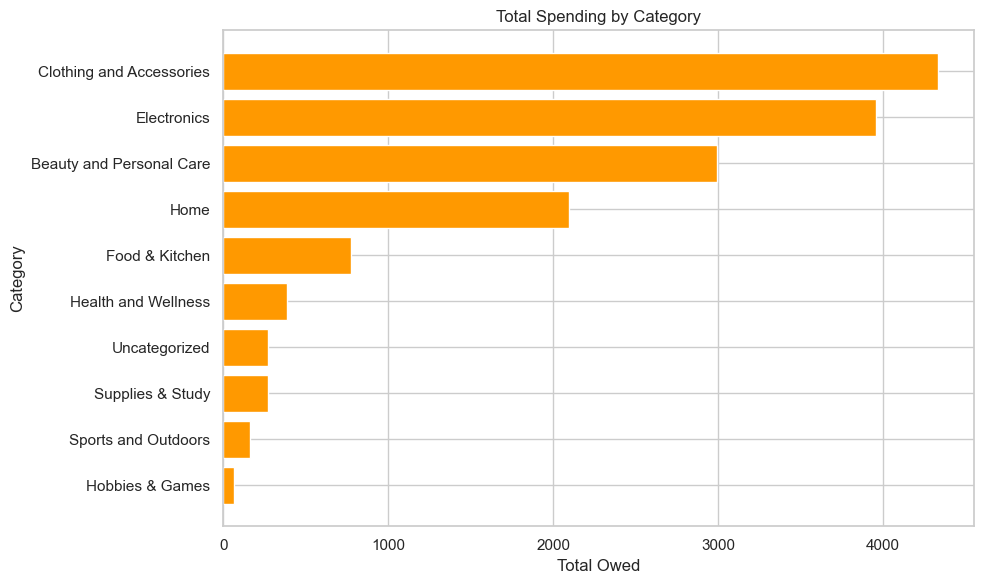

In [107]:
category_spending = df.groupby('Category')['Total Owed'].sum().reset_index()

# Sort categories by total spending
category_spending = category_spending.sort_values(by='Total Owed', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(category_spending['Category'], category_spending['Total Owed'], color='#FF9900')

plt.xlabel('Total Owed')
plt.ylabel('Category')
plt.title('Total Spending by Category')
plt.tight_layout()
plt.show()

In [108]:
# Convert 'Order Date' to datetime
# If 'Order Date' is already a datetime object, use .dt.date to get only the date part
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce').dt.date

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a 'Month-Year' column with the format 'Month-Year' (e.g., 'September-2024')
df['Month-Year'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()

# Extract the month and create a new column
# Extract the month
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Group by month and category, summing the Total Owed

C:\Users\user\AppData\Local\Temp\ipykernel_14824\9220755.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_summary.loc[year], y=df_summary.columns, palette="Set1")


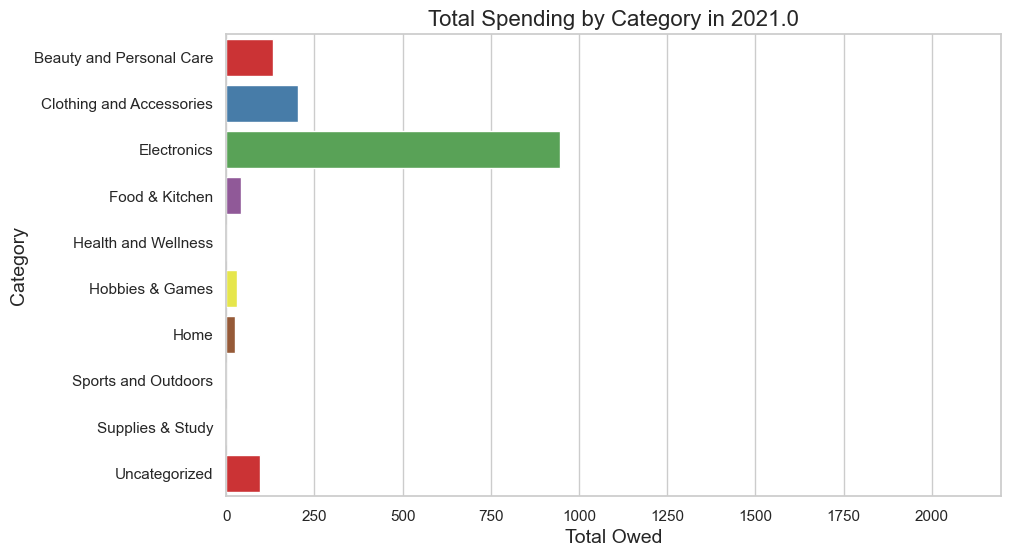

C:\Users\user\AppData\Local\Temp\ipykernel_14824\9220755.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_summary.loc[year], y=df_summary.columns, palette="Set1")


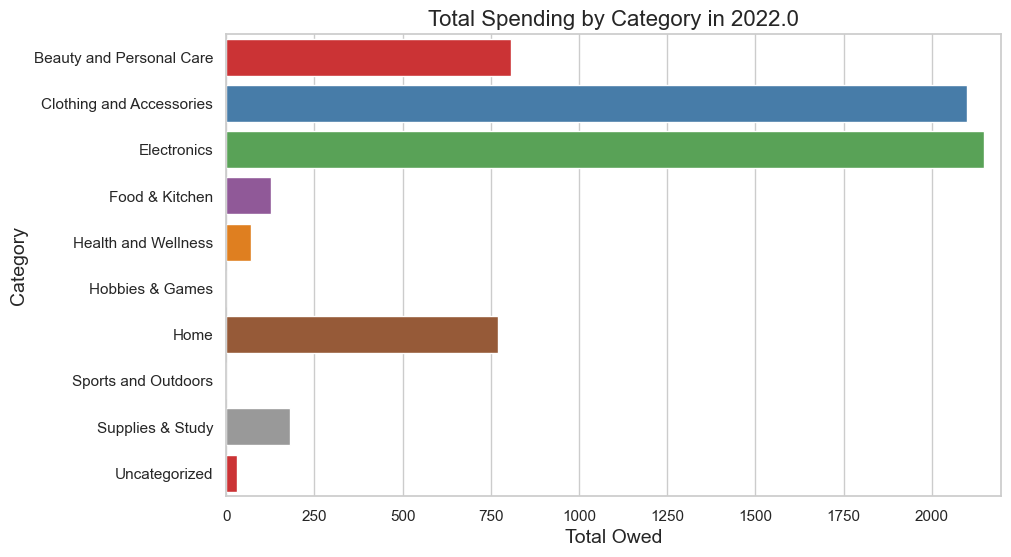

C:\Users\user\AppData\Local\Temp\ipykernel_14824\9220755.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_summary.loc[year], y=df_summary.columns, palette="Set1")


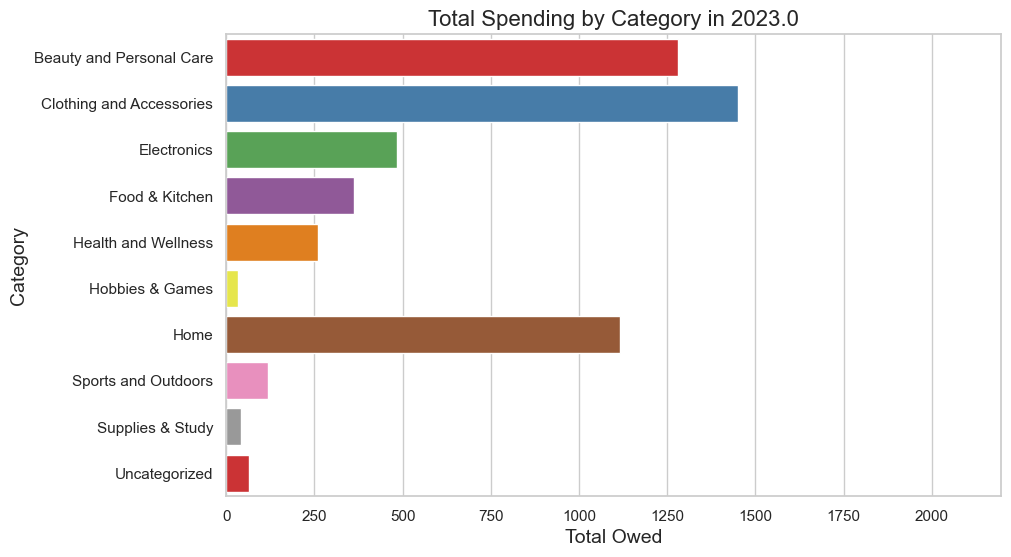

C:\Users\user\AppData\Local\Temp\ipykernel_14824\9220755.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_summary.loc[year], y=df_summary.columns, palette="Set1")


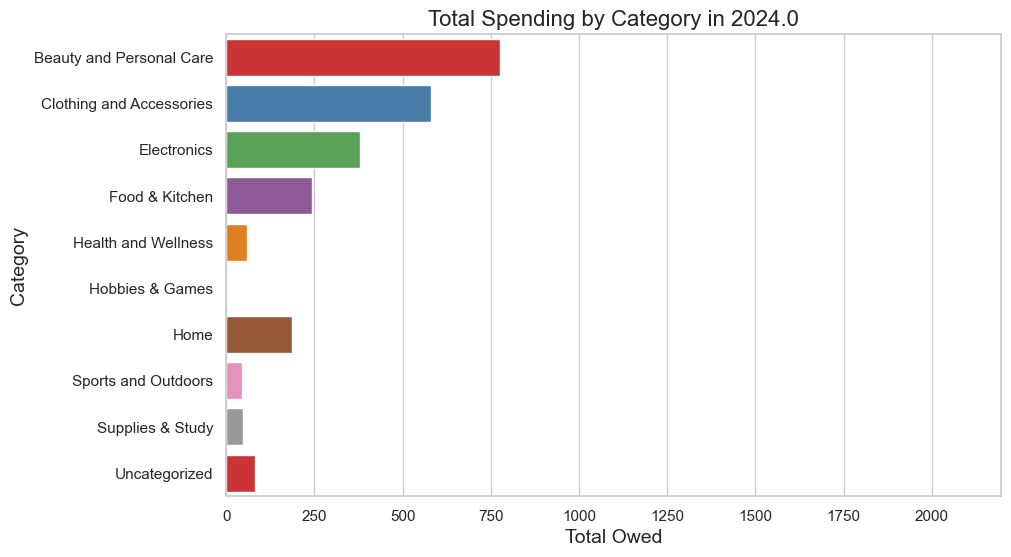

In [109]:
# Group data by Year, Category, and sum 'Total Owed'
df_grouped = df.groupby(['Year', 'Month', 'Category'])['Total Owed'].sum().reset_index()

# Now you can create the summary pivoted DataFrame
df_summary = df_grouped.groupby(['Year', 'Category'])['Total Owed'].sum().unstack().fillna(0)

# Proceed with your plotting code...


# Summarize total owed by year and category
df_summary = df_grouped.groupby(['Year', 'Category'])['Total Owed'].sum().unstack().fillna(0) # type: ignore

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a horizontal bar chart for each year
for year in df_summary.index:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df_summary.loc[year], y=df_summary.columns, palette="Set1")
    plt.title(f'Total Spending by Category in {year}', fontsize=16)
    plt.xlabel('Total Owed', fontsize=14)
    plt.ylabel('Category', fontsize=14)
    plt.xlim(0, df_summary.values.max() + 50)  # Adjust x-axis limit
    plt.show()


In [110]:
#repeatedly checking for uncategorized products and adding additional keywords 
uncategorized_products = df[df['Category'] == 'Uncategorized'][['Product Name', 'Total Owed']]

# Print the uncategorized products
print(uncategorized_products.to_string(index=False))

                                                                                                                                                           Product Name  Total Owed
                                                                                                                                     Matchbox Tesla Model X, red 18/100       13.96
                                                                                                  Colibri Butane 300millilitre (3-Pack) BHO Dry Vacuum Purge 5X Refined       41.80
                                                                                                                                  TERRO Ant Killer Liquid Baits T300CAN        9.64
                                                                                                                                                      As a Man Thinketh       16.94
                                                                                                    

In [111]:
#top 10 items with highesst spend
# Top 10 highest spending products
top_10_highest = df.nlargest(10, 'Total Owed')

# Display the results
print("Top 10 Highest Spending:")
print(top_10_highest[['Product Name', 'Total Owed', 'Category']].to_string(index=False))  # to_string to display full content


Top 10 Highest Spending:
                                                                                                                                                                                    Product Name  Total Owed                 Category
                                                                                                                 SHW 55-Inch Large Electric Height Adjustable Standing Desk, 140 x 71 cm, Cherry      507.22              Electronics
                                                                                                                    SHW 55-Inch Large Electric Height Adjustable Standing Desk, 140 x 71 cm, Oak      507.22              Electronics
MIULEE 2 Panels 84 Inch Natural Linen Semi Sheer Window Curtains Elegant Solid Netural Drapes Rod Pocket Window Voile Panels Linen Textured Panels for Bedroom Living Room (52" W X 84" L,Ivory)      336.60                     Home
                                                       

2. How does spending change over time (e.g., seasonality, sales events, different households)?
    + *KEY METRIC*: **Monthly/quarterly/yearly spend**, **seasonal** spending peaks, changes during sales events.


In [112]:
#how about total spend pver time?
#were working specifically with the Date, Total Owed columns here lets select them:
df[['Total Owed','Order Date']]



,Total Owed,Order Date
0,45.19,2024-09-11
1,19.73,2024-09-11
2,16.94,2024-09-11
3,11.29,2024-09-05
4,26.34,2024-09-05
...,...,...
517,282.49,2021-07-31
518,16.99,2021-06-11
519,18.99,2021-06-11
520,78.28,2021-06-08


# **Spending Over Time**

In [113]:

# Ensure 'Order Date' is in datetime format
is_datetime = pd.api.types.is_datetime64_any_dtype(df['Order Date'])

print(f"'Order Date' is in datetime format: {is_datetime}")


'Order Date' is in datetime format: True


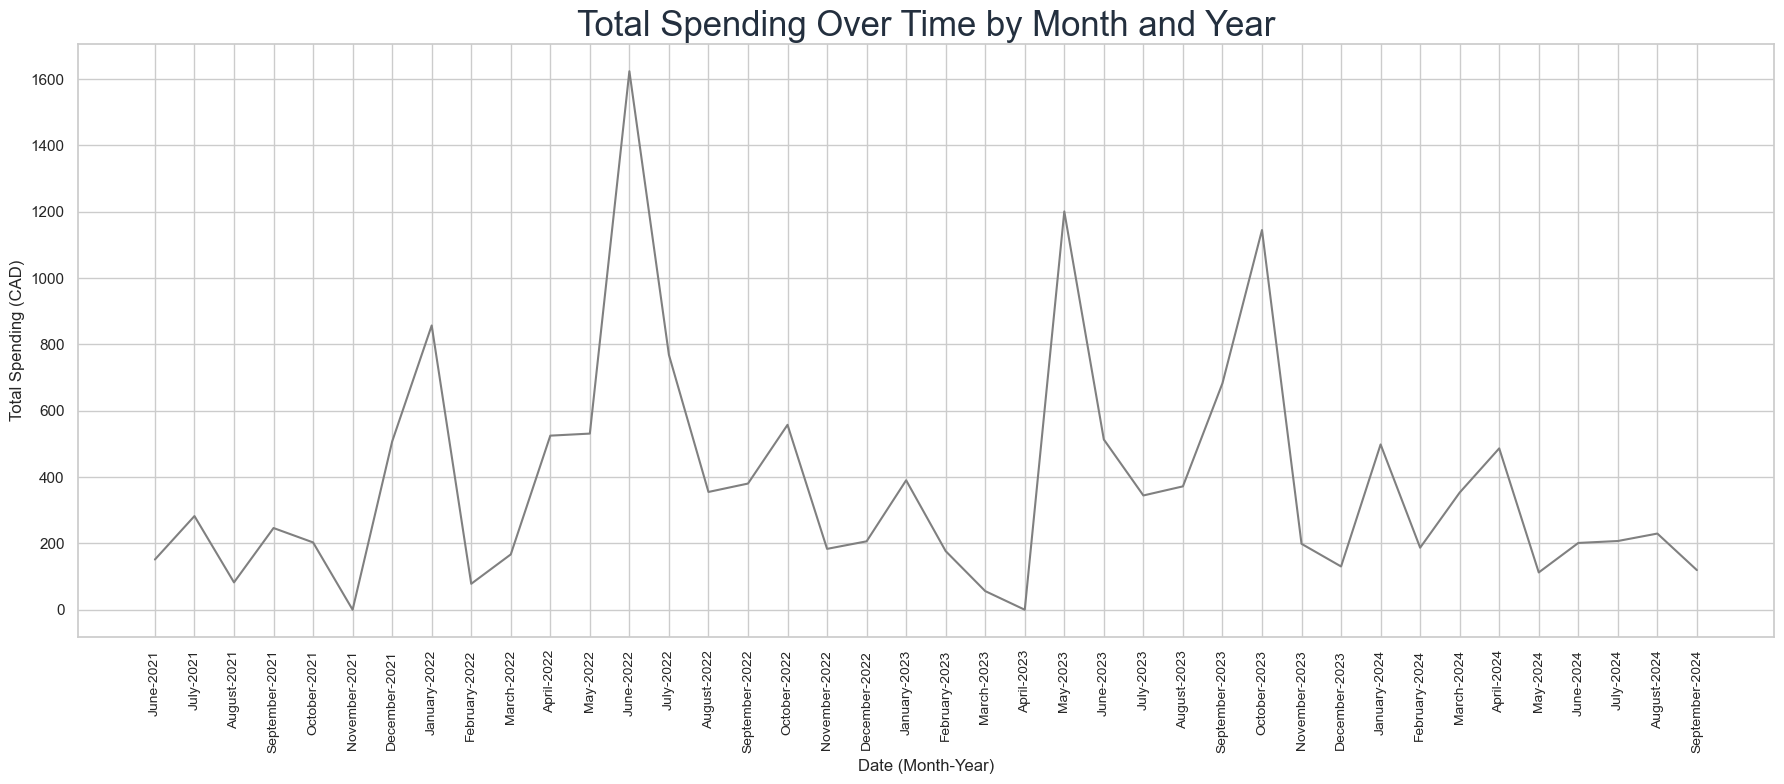

In [114]:


# Ensure 'Order Date' is in datetime format
# If 'Order Date' is already a datetime object, use .dt.date to get only the date part
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce').dt.date

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a 'Month-Year' column with the format 'Month-Year' (e.g., 'September-2024')
df['Month-Year'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()

# Group the data by 'Month-Year' to get total spending per month/year
monthly_spending = df.groupby('Month-Year')['Total Owed'].sum().reset_index()

# Create a complete date range from the minimum to the maximum date
date_range = pd.date_range(start=monthly_spending['Month-Year'].min(), 
                           end=monthly_spending['Month-Year'].max(), 
                           freq='MS')

# Merge the full date range with monthly spending, filling missing months with 0 spending
monthly_spending = pd.DataFrame(date_range, columns=['Month-Year']).merge(monthly_spending, on='Month-Year', how='left').fillna(0)

# Set up the plot using Seaborn for a bar chart
plt.figure(figsize=(18, 8))
sns.lineplot(x=monthly_spending['Month-Year'].dt.strftime('%B-%Y'), y='Total Owed', data=monthly_spending, color='grey')

# Customize the plot
plt.title('Total Spending Over Time by Month and Year', fontsize=25, color='#232F3E')
plt.xlabel('Date (Month-Year)', fontsize=12)
plt.ylabel('Total Spending (CAD)', fontsize=12)
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()


Another way of visualizing the graph above:

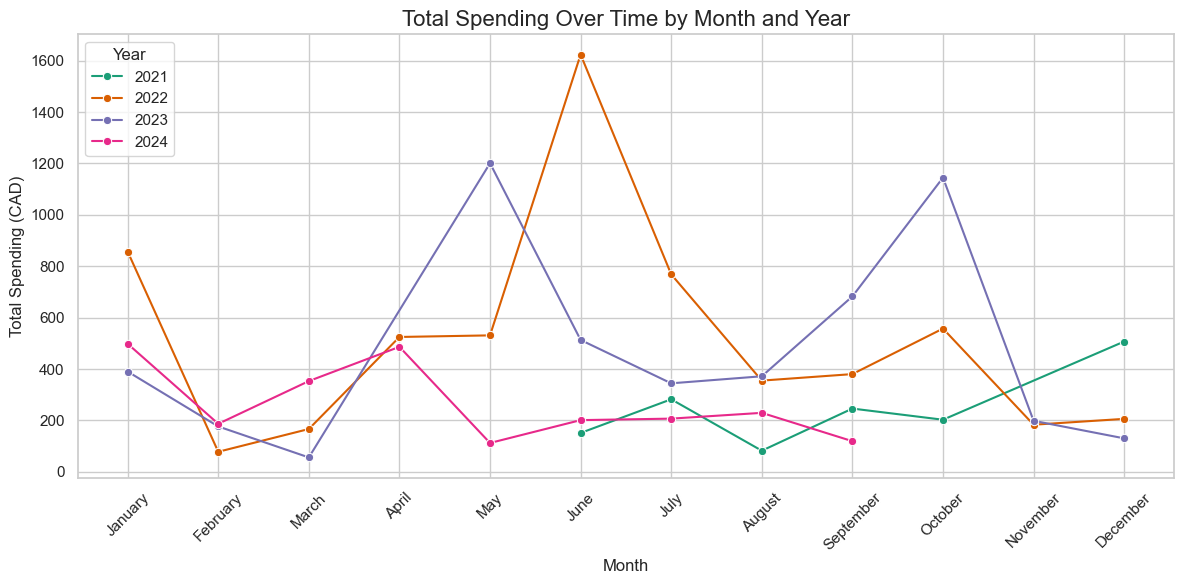

In [115]:
# Group by 'Month-Year' to get total spending per month/year
monthly_spending = df.groupby('Month-Year')['Total Owed'].sum().reset_index()

# Set the index to 'Month-Year' for easier plotting
monthly_spending.set_index('Month-Year', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_spending, x=monthly_spending.index.month, y='Total Owed', 
             hue=monthly_spending.index.year, palette='Dark2', marker='o')

# Customize x-axis to show full month names
plt.xticks(ticks=range(1, 13), labels=pd.date_range('2021-01-01', periods=12, freq='ME').month_name(), rotation=45)
plt.title('Total Spending Over Time by Month and Year', fontsize=16)
plt.xlabel('Month', fontsize=12)

plt.ylabel('Total Spending (CAD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Year', loc='upper left')

# Show the plot
plt.show()

In [116]:
df.head(25
        )

,Order ID,Order Date,Currency,Total Discounts,Total Owed,Quantity,Order Status,Ship Date,Carrier Name & Tracking Number,Product Name,Category,Month-Year,Month,Year
0,702-4060128-5100216,2024-09-11,CAD,0.00,45.19,1,Closed,2024-09-12T02:00:38.882Z,AMZN_CA(TBC196647251009),"Vacuum Storage Bags 12 Jumbo, Space Saver Seal...",Clothing and Accessories,2024-09-01,9.0,2024.0
1,702-6367895-0390655,2024-09-11,CAD,0.00,19.73,1,Closed,2024-09-11T15:11:45.482Z,AMZN_CA(TBC196615860009),frepstudio Cute Case Compatible for iPhone 15 ...,Clothing and Accessories,2024-09-01,9.0,2024.0
2,702-4060128-5100216,2024-09-11,CAD,0.00,16.94,1,Closed,2024-09-12T02:00:38.882Z,AMZN_CA(TBC196647251009),"Electric Air Pump for Vacuum Storage Bags, Por...",Electronics,2024-09-01,9.0,2024.0
3,702-1961167-2173022,2024-09-05,CAD,0.00,11.29,1,Closed,2024-09-06T01:10:10.657Z,AMZN_CA(TBC190843117009),"100PCS Nitrile Disposable Gloves , Latex Free ...",Food & Kitchen,2024-09-01,9.0,2024.0
4,702-1961167-2173022,2024-09-05,CAD,-10.68,26.34,1,Closed,2024-09-06T01:10:10.657Z,AMZN_CA(TBC190843117009),Bedsure Queen Sheet Set - Soft Sheets for Quee...,Home,2024-09-01,9.0,2024.0
5,702-1025179-8815454,2024-08-30,CAD,0.00,20.35,1,Closed,2024-08-31T02:37:02.043Z,AMZN_CA(TBC183886276009),MOTIONS Neutralizing Shampoo,Beauty and Personal Care,2024-08-01,8.0,2024.0
6,702-5126667-0137849,2024-08-30,CAD,0.00,30.50,1,Closed,2024-08-30T08:22:15.315Z,AMZN_CA(TBC183733106009),"Linange Alter Ego Shea Butter Texturizer, 16 O...",Beauty and Personal Care,2024-08-01,8.0,2024.0
7,702-2698670-6757065,2024-08-24,CAD,-4.00,22.59,1,Closed,2024-08-24T06:04:50Z,AMZN_CA(TBC177126801009),Bedsure Cooling Pillow Case King Size 2 Pack -...,Clothing and Accessories,2024-08-01,8.0,2024.0
8,702-2698670-6757065,2024-08-24,CAD,0.00,40.67,1,Closed,2024-08-24T06:04:50Z,AMZN_CA(TBC177126801009),CanPrev - Pure Magnesium Bis-Glycinate 200mg (...,Health and Wellness,2024-08-01,8.0,2024.0
9,702-1922212-1061822,2024-08-08,CAD,0.00,22.58,2,Closed,2024-08-09T06:27:10Z,AMZN_CA(TBC161232625009),Prayer Journal for Men - 'I am a Son of the Ki...,Supplies & Study,2024-08-01,8.0,2024.0


### We can also utilize a heatmap to visualize specifc day-to-day trends in spending purchases through the months.

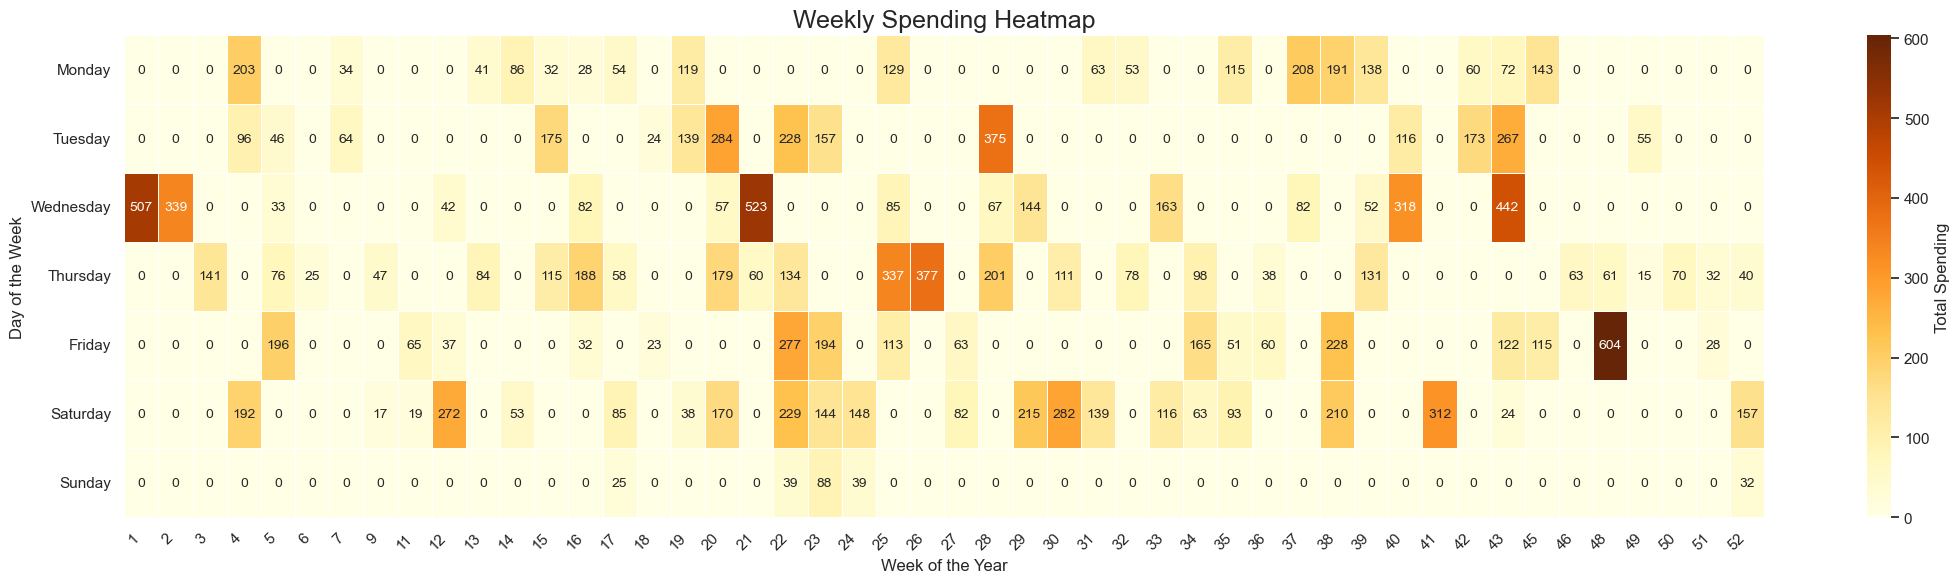

In [117]:

# Reorder the rows to have days in the correct order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day = df['Order Date'].dt.day_name()
week = df['Order Date'].dt.isocalendar().week
heatmap_data = df.pivot_table(index=day, columns=week, values='Total Owed', aggfunc='sum', fill_value=0) 
heatmap_data = heatmap_data.reindex(ordered_days)

# Create the heatmap
plt.figure(figsize=(22, 6))  # Increased size for better readability
sns.heatmap(heatmap_data, cmap='YlOrBr', annot=True, fmt='.0f', linewidths=.5, annot_kws={"size": 10}, cbar_kws={'label': 'Total Spending'})

# Customize the plot
plt.title('Weekly Spending Heatmap', fontsize=18)
plt.xlabel('Week of the Year', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


### Awesome! Seems like purchaes were unlikely to be made at the beginning of the week - packagees came in droves around mid-to-end of the week and are bunched around the very beginning, summers, and christmas season. Now lets gather some more key metrics for total spend by season, and even month! With some additional code, we can calculate spending by month in a pie chart, to see some valuable insights.

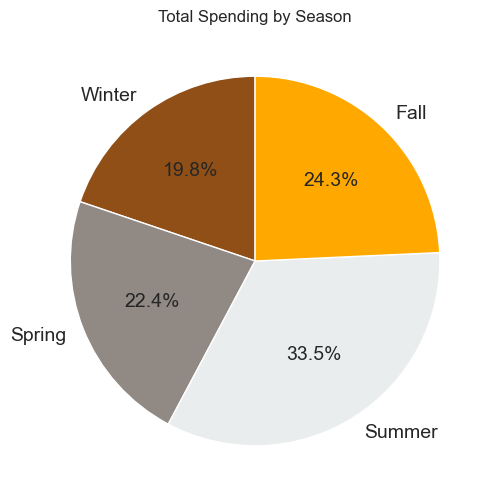

In [118]:
# Assuming df['Order Date'] is already in datetime format
df['Month'] = df['Order Date'].dt.month

# Define the seasons by months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a Season column
df['Season'] = df['Month'].apply(get_season)

# Group by season to get total spending
seasonal_spending = df.groupby('Season')['Total Owed'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Plotting the pie chart for seasonal spending
plt.figure(figsize=(8, 6))
colors = ['#8f4f17', '#918a84', '#EAEDED', '#FFA800']  # Using Amazon's primary colors + orange for variation

plt.pie(seasonal_spending, labels=seasonal_spending.index, autopct='%1.1f%%', colors=colors, startangle=90, 
        wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 14})

plt.title('Total Spending by Season')
plt.show()

### A handy reminder to go easy during the summer season! 

3. What types of items did I regeret buying the most, or needed to return for defect/other issues?
    + *KEY METRIC*: **Number** of returns by category, **reasons** for returns, items with highest regret rates.


In [119]:
##orking with returns now - read in returns (2 tables ppreviously merged)
rf = pd.read_csv('Retail.OrdersReturned.1.csv')
rf.head()


,Website,ReversalID,OrderID,CreationDate,Quantity,RefundCompletionDate,RefundCompletionDate2,Amount,Currency,DisbursementType,ReversalStatus,ReversalAmountState,ReversalReason,DirectDebitRefundAmount
0,Amazon.ca,Ni8SxwwwS7iuyzZ1BYyvFg,702-7845168-0330623,7/25/2024 15:03,1,7/19/2024,45498.76488,13.55,CAD,Refund,Completed,Final,Customer return,0
1,Amazon.ca,mVJpUrsMSjeXfsublu7+Eg,702-7339144-2714656,7/18/2024 18:27,1,4/8/2024,45491.89091,22.59,CAD,Refund,Completed,Final,Customer return,0
2,Amazon.ca,95fDoeUiRASd//acnxeBBQ,702-9903012-8996264,4/7/2024 19:00,1,3/30/2024,45389.82629,0.00,CAD,Refund,Declined,Final,Customer return,0
3,Amazon.ca,VgWmWZCPS9mARO5w3yAV9Q,702-4853823-3977051,3/29/2024 15:51,1,3/29/2024,45380.79241,21.46,CAD,Refund,Completed,Final,Customer return,0
4,Amazon.ca,Pa9qzNt1QYKrqM9QDTBUNA,702-2382685-0809025,3/28/2024 19:51,1,3/29/2024,45379.97920,33.89,CAD,Refund,Completed,Final,Customer return,0


In [125]:
# Remove rows where 'Reversal Status' is 'declined'
rf_filtered = rf[rf['ReversalStatus'] != 'Declined']

# Check the filtered data
rf_filtered.head()

,Website,ReversalID,OrderID,CreationDate,Quantity,RefundCompletionDate,RefundCompletionDate2,Amount,Currency,DisbursementType,ReversalStatus,ReversalAmountState,ReversalReason,DirectDebitRefundAmount
0,Amazon.ca,Ni8SxwwwS7iuyzZ1BYyvFg,702-7845168-0330623,7/25/2024 15:03,1,7/19/2024,45498.76488,13.55,CAD,Refund,Completed,Final,Customer return,0
1,Amazon.ca,mVJpUrsMSjeXfsublu7+Eg,702-7339144-2714656,7/18/2024 18:27,1,4/8/2024,45491.89091,22.59,CAD,Refund,Completed,Final,Customer return,0
3,Amazon.ca,VgWmWZCPS9mARO5w3yAV9Q,702-4853823-3977051,3/29/2024 15:51,1,3/29/2024,45380.79241,21.46,CAD,Refund,Completed,Final,Customer return,0
4,Amazon.ca,Pa9qzNt1QYKrqM9QDTBUNA,702-2382685-0809025,3/28/2024 19:51,1,3/29/2024,45379.97920,33.89,CAD,Refund,Completed,Final,Customer return,0
5,Amazon.ca,qEKDt0CSTNeI+ZB6Ex0kZA,702-2382685-0809025,3/28/2024 19:49,1,3/27/2024,45379.97920,33.89,CAD,Refund,Completed,Final,Customer return,0




4. **Visualization**: Built multiple graphs, such as weighted bars, heatmaps, and line charts to visualize spending habits, showcasing data with year-over-year spending, category breakdowns, and spending by month in Matplotlib and Seaborn.
---

### **Skills**:
- **Python**: Proficiency in Pandas for data manipulation, Matplotlib for plotting spending trends.

---

### **Results & Insights**:
The analysis provided clear insights into my Amazon spending trends:

1. **Top Categories**: The majority of my spending was concentrated in categories like xyz and xyz, with lower spending on physical goods over time.


2. **Spending Peaks**: There are consistent spikes in spending during major sale events like Black Friday, Mid-Summer, and early New Year's holiday seasons.


3. **Year-to-Year Trends**: There is a clear yearly pattern, where spending increases in electronincs and/or clothing & accessories during sales events but decreases or stays stagnant in categories like food & kitchen, health and wellness, and hobbies/games.

---

### **Recommendations**:
1. **Budget Awareness**: Set spending limits based on historical trends to avoid overspending during high-volume periods (e.g., New Year's, Christmas).
2. **Category-Based Spending**: Focus on essential categories and limit impulse purchases, especially in categories with rising costs.
3. **Optimize Sale Purchases**: Use trend data to strategically plan purchases during sales events, optimizing savings and reducing unnecessary spending.

---

### **Next Steps**:
+ **Long-Term Spending Forecast**: Use Python to build a basic predictive model that forecasts spending patterns based on historical data and upcoming sales events.
+ **Improve Visualization**: Expand the dashboard with additional metrics, such as addresses, card types, shipping costs, and delivery preferences.

---

By understanding historical spending behavior and leveraging data insights, I can hopefully make more informed decisions about my future Amazon purchases!